In [151]:
#Import libaries 
import pandas as pd
import re
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import repeat
from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats
import nltk

In [152]:
df = pd.read_pickle('all_scripts_cleaned_total-99.pickle')

# Classifying fighting topic 

In [153]:
#Fighting dictionary
fighting = ['action','actions','alliance','alliances','ambusher','ambushers ','armed','armor','army','battle','battling','beast','beasts',
            'bomb','bombs','booby','boobytrap ','cannon ','cannons','chase','chased','combat','command','commanding','crash ','crashing',
            'crime','crimes','criminal','criminals','danger','defend','defending','enemies','enemy ','fight','fighters ','fighting','fighting',
            'fire','general','grave','guard','gun','gunfight','gunpowder','guns','gunshot','gunshots','hangman ','hellfire','henchmen ',
            'hunter','hunters','invasion','kidnap','kidnapping','knive','knives','military','rival','shoot','shot','shots','soldier','soldiers ',
            'spy','stab','stabing','sword','trap','trapped','troops','violence','violent','war','warrior','warriors','weapon','weapons']

In [154]:
#Making function to apply fighting dictionary for character lines 
def word_checker(sentence):
    if any(word in fighting for word in sentence.lower().split()):
        return 1
    else:
        return 0
df['Fighting'] = df['Clean_Line_all'].apply(word_checker) 

# Classifying romance topic

In [155]:
#Making romance dictionaries (several because we have dependencies) 
romance = ['kiss ','my dear ','love','kissing','hug','cheek','hugging','kisses','dears','dearest','heart','kindness','lovesick','marriage',
           'marry','marriages','kissed','hugs','suitor','suitors','romantic','affection','affectionately','affectionate','affections','romance','poem',
           'poems','sweetheart','sweethearts','adore', 'adoring','maiden','bride','wife']
dear = ['dear']
oh = ['oh']
afraid = ['afraid']
loose = ['loose','lost']
soul = ['soul']
crush = ['crush','chrushing','heart','mate']

In [156]:
#First we just assing romance if a word in lines are in the romance list 
def word_checker1(sentence):
    if any(word in romance for word in sentence.lower().split()):
        return 1
    else:
        return 0
df['romance'] = df['Clean_Line_all'].apply(word_checker1) 

#Then we come to the conditional words - here we make a column of 
#lines containing the word dear and a column for lines containing the word oh 
# and then if dear is equal to 1 and oh is equal to 0 
#meaning dear is in their but oh is not then we assign it to romance aswell 
def word_checker1(sentence):
    if any(word in dear for word in sentence.lower().split()):
        return 1
    else:
        return 0
df['dear'] = df['Clean_Line_all'].apply(word_checker1) 
def word_checker2(sentence):
    if any(word in oh for word in sentence.lower().split()):
        return 1
    else:
        return 0
df['oh'] = df['Clean_Line_all'].apply(word_checker2) 

def column (row):
    if row['dear'] == 1 and row['oh'] == 0:
        return 1
    else:
        return 0
df['oh dear']= df.apply (lambda row: column(row), axis=1)

#Then we come to the conditional words - here we make a column of 
#lines containing the word afraid and a column for lines containing the word loose or lost
# and then if both is equal to 1 we assign it to romance aswell 
def word_checker3(sentence):
    if any(word in afraid for word in sentence.lower().split()):
        return 1
    else:
        return 0
df['afraid'] = df['Clean_Line_all'].apply(word_checker3) 
def word_checker4(sentence):
    if any(word in loose for word in sentence.lower().split()):
        return 1
    else:
        return 0
df['loose'] = df['Clean_Line_all'].apply(word_checker4) 

def column1 (row):
    if row['afraid'] == 1 and row['loose'] == 1:
        return 1
    else:
        return 0
df['afraid loose']= df.apply (lambda row: column1(row), axis=1)

#Then we come to the conditional words - here we make a column of 
#lines containing the word soul and a column for lines containing the word crush
# and then if both is equal to 1 we assign it to romance aswell 
def word_checker5(sentence):
    if any(word in soul for word in sentence.lower().split()):
        return 1
    else:
        return 0
df['soul'] = df['Clean_Line_all'].apply(word_checker5) 
def word_checker6(sentence):
    if any(word in crush for word in sentence.lower().split()):
        return 1
    else:
        return 0
df['crush'] = df['Clean_Line_all'].apply(word_checker6) 

def column1 (row):
    if row['soul'] == 1 and row['crush'] == 1:
        return 1
    else:
        return 0
df['soul crush']= df.apply (lambda row: column1(row), axis=1)


df['romance1'] = df['oh dear'] + df['romance'] + df['afraid loose'] + df['soul crush']
def romance (row):
    if row['romance1'] != 0:
        return 1
    else:
        return 0
df['Romance']= df.apply (lambda row: romance(row), axis=1)

In [157]:
#Drop extra columns 
df = df.drop(['romance','dear','oh','afraid','loose','oh dear','afraid loose','soul','crush','soul crush','romance1'], axis=1)  

# Classifying family honor 

In [158]:
#Making dictionaries for the family honor theme (several because we have dependencies) 
list1 = ["ran away","family tradition","disappointed in you"]


list2 = ["family","mother","father","dad","mom","daughter",
         "son","pepa","brother","sister","abuela","mama",
         "grandmother","grandfather","ancestors","home","parents"]
list3 = ["disappointed", "dishonor", "honor", "disgrace", "ran away", "match", "value", "proud", 
         "provide", "provite", "fault", "perfect", "threat", "shame", "fate", "cut me off",
         "abandoned", "leave", "sorry", "because of you", "apologize", "forced", "wants me to marry"]


list4 = ["duties", "gift"]
list5 = ["honor"]




In [159]:
#Making new columns for if the character line contains one or more words in the lists 
df["list1"] = df["Clean_Line_all"].str.contains('|'.join(list1), na=False)
df["list2"] = df["Clean_Line_all"].str.contains('|'.join(list2), na=False)
df["list3"] = df["Clean_Line_all"].str.contains('|'.join(list3), na=False)
df["list4"] = df["Clean_Line_all"].str.contains('|'.join(list4), na=False)
df["list5"] = df["Clean_Line_all"].str.contains('|'.join(list5), na=False)

#Defining a function to check if the honor theme is present in character lines based on dependencies
def honor_label (row):
    if row['list1'] == True:
        return 1
    if row['list2'] == True and row['list3'] == True:
        return 1
    if row['list4'] == True and row['list5'] == True:
        return 1
    else:
        return 0

df['Honor']= df.apply (lambda row: honor_label(row), axis=1)


In [160]:
#Drop execive columns 
df = df.drop(['list1','list2','list3','list4','list5'], axis = 1)

# Classifyin family care

In [161]:
#Making lists for the family care theme 
list6 = ["daughter","home"]
list7 = ["friend", "lived", "beloved child", "house", "member", "mothers care",
         "reunited", "provide", "provite", "together", "part of", "generation", "raise", "settled", 
         "love", "important", "join our", "miss", "help", "amazing", "special", "thankful", "protect",
         "present my", "vulnerable"]
list8 = ["family","mother","father","dad","mom","son","pepa","brother","sister","abuela","mama",
         "grandmother","grandfather","ancestors","parents"]
list9 = ["daughter", "friend", "lived", "beloved child", "house", "home", "member", 
         "mothers care","reunited", "provide", "provite", "together", "part of", 
         "generation", "raise", "settled", "love", "important", "join our", "miss", 
         "help", "amazing", "special", "thankful", "protect","present my", "vulnerable"]
list10 = ["daughter"]
list11 = ["hurt", "safe"]
list12 = ["family"]
list13 = ["good"]
list14 = ["one of the family","is family","means family","been in the family",
          "be there for you","we are family","careful"]


In [162]:
#Making new columns for if the character line contains one or more words in the lists 
df["list6"] = df["Clean_Line_all"].str.contains('|'.join(list6), na=False)
df["list7"] = df["Clean_Line_all"].str.contains('|'.join(list7), na=False)
df["list8"] = df["Clean_Line_all"].str.contains('|'.join(list8), na=False)
df["list9"] = df["Clean_Line_all"].str.contains('|'.join(list9), na=False)
df["list10"] = df["Clean_Line_all"].str.contains('|'.join(list10), na=False)
df["list11"] = df["Clean_Line_all"].str.contains('|'.join(list11), na=False)
df["list12"] = df["Clean_Line_all"].str.contains('|'.join(list12), na=False)
df["list13"] = df["Clean_Line_all"].str.contains('|'.join(list13), na=False)
df["list14"] = df["Clean_Line_all"].str.contains('|'.join(list14), na=False)

#Defining a function to check if the family care theme is present in character lines based on dependencies

def care_label (row):
    if row['list6'] == True and row['list7'] == True:
        return 1
    if row['list8'] == True and row['list9'] == True:
        return 1
    if row['list10'] == True and row['list11'] == True:
        return 1
    if row['list12'] == True and row['list13'] == True:
        return 1
    if row['list14'] == True:
        return 1
    else:
        return 0

df['Care']= df.apply (lambda row: care_label(row), axis=1)

In [163]:
#Drop execive lines
df = df.drop(['list6','list7','list8','list9','list10','list11',
              'list12','list13','list14'], axis = 1)

In [164]:
#save to pickle 
df.to_pickle('all_scripts_with_topic.pickle')

In [165]:
#save to excel 
df.to_excel('all_scripts_with_topic.xlsx')

# Plotting the topics and testing 

In [166]:
# create for loop for testing z-test
import statsmodels.api as sm

# list of columns we want to test 
test_list = ['Fighting','Romance','Honor','Care']
z_test_results = []
m_mean = []
w_mean = []

for column in test_list:
    column = column
    male = df.query('Gender == "Male"')[column] 
    male = sm.stats.DescrStatsW(male)
    male_mean = df.loc[df['Gender'] == 'Male'][column].mean()
    m_mean.append(male_mean)
    female = df.query('Gender == "Female"')[column]
    female = sm.stats.DescrStatsW(female)
    female_mean = df.loc[df['Gender'] == 'Female'][column].mean()
    w_mean.append(female_mean)
    z_test = sm.stats.CompareMeans(male, female).ztest_ind(usevar='unequal',value=0)
    z_test_results.append(z_test)
    
test_df = pd.DataFrame(
    {'Topic': test_list,
     'Mean for men': m_mean,
     'Mean for women': w_mean,
     'Z_test': z_test_results,
    })


In [167]:
test_df

,Topic,Mean for men,Mean for women,Z_test
0,Fighting,0.011521,0.008432,"(3.099159371449355, 0.0019407059511531398)"
1,Romance,0.011768,0.018777,"(-5.351542998322508, 8.720740986282009e-08)"
2,Honor,0.003171,0.005102,"(-2.81302350401333, 0.004907806369028121)"
3,Care,0.011063,0.015659,"(-3.7807116309892406, 0.00015638072354503402)"


In [168]:
# testing anova for era and each theme 
import pingouin as pg
aov = pg.anova(data=df, dv='Fighting', between='Era', detailed=True)
aov1 = pg.anova(data=df, dv='Romance', between='Era', detailed=True)
aov2 = pg.anova(data=df, dv='Honor', between='Era', detailed=True)
aov3 = pg.anova(data=df, dv='Care', between='Era', detailed=True)
print('Fighting is:',"\n","\n",aov)
print('Romance is:',"\n","\n",aov1)
print('Honor is:',"\n","\n",aov2)
print('Care is:',"\n","\n",aov3)

Fighting is: 
 
    Source          SS     DF        MS          F         p-unc       np2
0     Era    0.943241      5  0.188648  18.201435  4.320049e-18  0.002137
1  Within  440.375832  42489  0.010364        NaN           NaN       NaN
Romance is: 
 
    Source          SS     DF        MS         F     p-unc       np2
0     Era    0.494963      5  0.098993  7.128238  0.000001  0.000838
1  Within  590.061667  42489  0.013887       NaN       NaN       NaN
Honor is: 
 
    Source          SS     DF        MS         F     p-unc       np2
0     Era    0.113563      5  0.022713  5.984021  0.000015  0.000704
1  Within  161.268858  42489  0.003796       NaN       NaN       NaN
Care is: 
 
    Source          SS     DF        MS         F     p-unc       np2
0     Era    0.216035      5  0.043207  3.476624  0.003832  0.000409
1  Within  528.048466  42489  0.012428       NaN       NaN       NaN


In [170]:
#Subsetting data for theme and era to prepare for pairwise anova testing 
df_anova = df[['Fighting','Romance','Honor','Care','Era']].copy()

## Pairwise thesting for each theme

In [174]:
#Pairwise fighting
import scikit_posthocs as sp
sp.posthoc_ttest(df_anova, val_col='Fighting', group_col='Era', p_adjust=None, pool_sd=True )

,The Golden Age,The Bronze Age,The Disney Renaissance,Post Renaissance Era,The Revival Era,Present period
The Golden Age,1.000000e+00,8.330312e-01,0.000036,3.370699e-14,3.532704e-01,5.971116e-01
The Bronze Age,8.330312e-01,1.000000e+00,0.001295,3.078772e-08,5.880916e-01,5.598413e-01
The Disney Renaissance,3.581795e-05,1.294783e-03,1.000000,6.448404e-02,3.361916e-03,4.281159e-06
Post Renaissance Era,3.370699e-14,3.078772e-08,0.064484,1.000000e+00,3.810279e-08,8.215479e-17
The Revival Era,3.532704e-01,5.880916e-01,0.003362,3.810279e-08,1.000000e+00,1.694996e-01
Present period,5.971116e-01,5.598413e-01,0.000004,8.215479e-17,1.694996e-01,1.000000e+00


In [175]:
#Pairwise romance
import scikit_posthocs as sp
sp.posthoc_ttest(df_anova, val_col='Romance', group_col='Era', p_adjust=None, pool_sd=True )

,The Golden Age,The Bronze Age,The Disney Renaissance,Post Renaissance Era,The Revival Era,Present period
The Golden Age,1.000000,0.591973,0.004124,0.000732,0.000007,0.401852
The Bronze Age,0.591973,1.000000,0.005288,0.002268,0.000066,0.257921
The Disney Renaissance,0.004124,0.005288,1.000000,0.891774,0.336343,0.018319
Post Renaissance Era,0.000732,0.002268,0.891774,1.000000,0.200581,0.005472
The Revival Era,0.000007,0.000066,0.336343,0.200581,1.000000,0.000074
Present period,0.401852,0.257921,0.018319,0.005472,0.000074,1.000000


In [176]:
#Pairwise family honor
import scikit_posthocs as sp
sp.posthoc_ttest(df_anova, val_col='Honor', group_col='Era', p_adjust=None, pool_sd=True )

,The Golden Age,The Bronze Age,The Disney Renaissance,Post Renaissance Era,The Revival Era,Present period
The Golden Age,1.000000,0.000163,0.069600,0.005124,0.595733,0.654722
The Bronze Age,0.000163,1.000000,0.000005,0.161785,0.003544,0.000382
The Disney Renaissance,0.069600,0.000005,1.000000,0.000146,0.043430,0.030242
Post Renaissance Era,0.005124,0.161785,0.000146,1.000000,0.063247,0.011834
The Revival Era,0.595733,0.003544,0.043430,0.063247,1.000000,0.845577
Present period,0.654722,0.000382,0.030242,0.011834,0.845577,1.000000


In [177]:
#Pairwise family care
import scikit_posthocs as sp
sp.posthoc_ttest(df_anova, val_col='Care', group_col='Era', p_adjust=None, pool_sd=True )

,The Golden Age,The Bronze Age,The Disney Renaissance,Post Renaissance Era,The Revival Era,Present period
The Golden Age,1.000000,0.000148,0.154034,0.141161,0.007701,0.021409
The Bronze Age,0.000148,1.000000,0.054413,0.015347,0.206662,0.022110
The Disney Renaissance,0.154034,0.054413,1.000000,0.823422,0.412915,0.897960
Post Renaissance Era,0.141161,0.015347,0.823422,1.000000,0.226499,0.638952
The Revival Era,0.007701,0.206662,0.412915,0.226499,1.000000,0.349533
Present period,0.021409,0.022110,0.897960,0.638952,0.349533,1.000000


# Plotting the themes for gender

In [110]:
#Set colors
colors = ["#F97306", "#840000", "#98c862", "#4c8e70"]

In [111]:
df_gender = df
df_gender["Gender"].replace({"Female": "Women", "Male": "Men"}, inplace=True)

In [112]:
mean_topics = df_gender[['Fighting', 'Romance', 'Honor', 'Care','Gender']].groupby('Gender').mean()*100

In [113]:
mean_topics = mean_topics.reset_index()
mean_topics 

,Gender,Fighting,Romance,Honor,Care
0,Men,1.152139,1.176802,0.317102,1.106335
1,Women,0.843194,1.877701,0.510168,1.565932


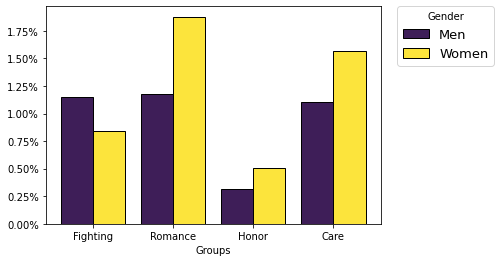

In [115]:
colors = ["#3e1e58", "#fce43c", "#98c862", "#4c8e70"]
X = ['Fighting', 'Romance', 'Honor', 'Care']
Men = [1.152139,1.176802,0.317102,1.106335]
Women = [0.843194,1.877701,0.510168,1.565932]
  
X_axis = np.arange(len(X))
  
ax = plt.bar(X_axis - 0.2, Men, 0.4, label = 'Men', color ="#3e1e58",edgecolor='black', )
ax = plt.bar(X_axis + 0.2, Women, 0.4, label = 'Women',color ="#fce43c",edgecolor='black', )
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Gender', fontsize = 13)
#plt.show()
plt.savefig('gender and topics in percent.png', bbox_inches='tight')

## Plotting era and gender over time

In [116]:
df['Era'] = df['Era'].replace({'The Golden Age': 'A The Golden Age', 'The Bronze Age': 'B The Bronze Age', 'The Disney Renaissance': 'C The Disney Renaissance', 
                               'Post Renaissance Era': 'D Post Renaissance Era','The Revival Era': 'E The Revival Era',
                               'Present period': 'F Present period'})

In [118]:
df_women = df[df.Gender == 'Women']
df_men = df[df.Gender == 'Men']

mean_era_women = df_women[['Fighting', 'Romance', 'Honor', 'Care','Era']].groupby('Era').mean()*100
mean_era_men = df_men[['Fighting', 'Romance', 'Honor', 'Care','Era']].groupby('Era').mean()*100

mean_era_women = mean_era_women.reset_index()

mean_era_men = mean_era_men.reset_index()

mean_era_women

,Era,Fighting,Romance,Honor,Care
0,A The Golden Age,0.465387,2.559628,0.290867,1.337987
1,B The Bronze Age,1.295097,2.960222,0.185014,1.295097
2,C The Disney Renaissance,1.815736,3.093477,1.075992,1.681237
3,D Post Renaissance Era,0.575333,1.366415,0.359583,1.474290
4,E The Revival Era,0.691718,1.551692,0.373902,1.476912
5,F Present period,1.002358,1.297170,1.120283,2.299528


In [132]:
mean_era_men

,Era,Fighting,Romance,Honor,Care
0,A The Golden Age,1.205546,1.748041,0.391802,1.537071
1,B The Bronze Age,1.744422,1.257606,0.040568,1.257606
2,C The Disney Renaissance,2.051481,1.354751,0.425779,1.083801
3,D Post Renaissance Era,0.867900,1.033823,0.280791,0.778558
4,E The Revival Era,0.741222,1.040312,0.312094,1.170351
5,F Present period,0.681699,0.734137,0.419507,1.310960


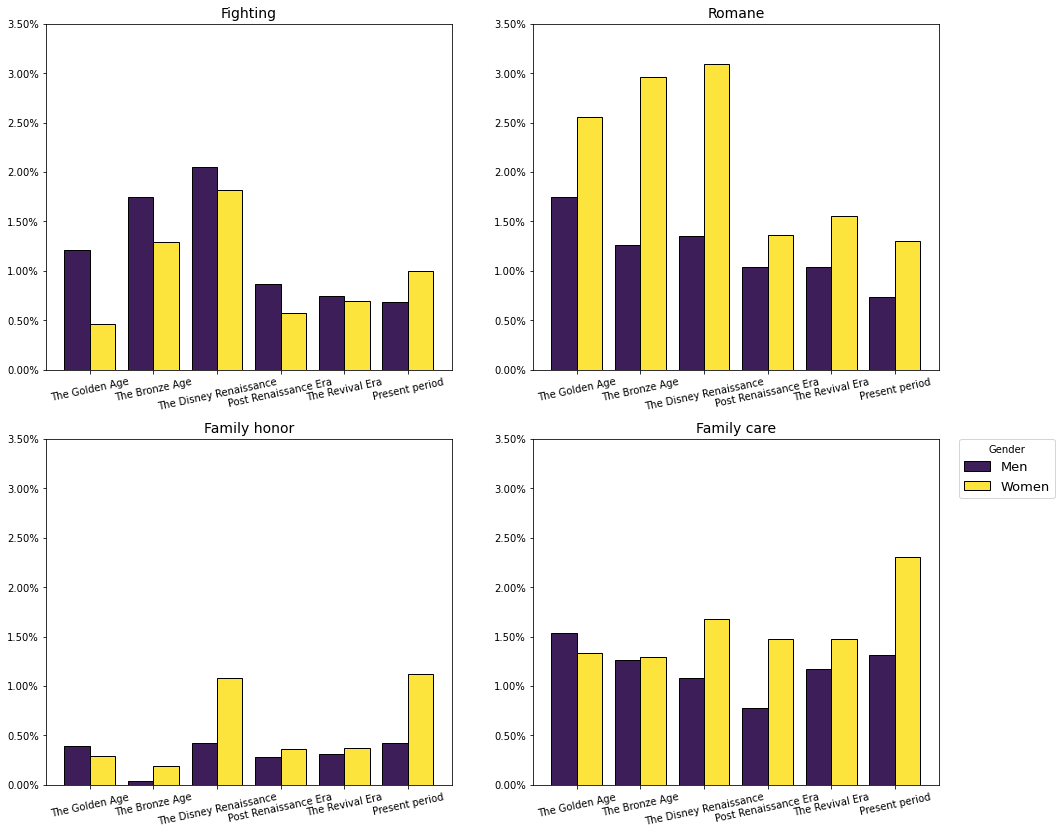

In [138]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 14))
colors = ["#3e1e58", "#fce43c", "#98c862", "#4c8e70"]
xlabels = ['The Golden Age', 'The Bronze Age', 'The Disney Renaissance',
           'Post Renaissance Era', 'The Revival Era', 'Present period']
X = ['A The Golden Age', 'B The Bronze Age', 'C The Disney Renaissance', 'D Post Renaissance Era','E The Revival Era','F Present period']
Menf = [1.205546,1.744422,2.051481,0.867900,0.741222,0.681699]
Womenf = [0.465387,1.295097,1.815736,0.575333,0.691718,1.002358]

Menr = [1.748041,1.257606,1.354751,1.033823,1.040312,0.734137]
Womenr = [2.559628,2.960222,3.093477,1.366415,1.551692,1.297170]

Menh = [0.391802,0.040568,0.425779,0.280791,0.312094,0.419507]
Womenh = [0.290867,0.185014,1.075992,0.359583,0.373902,1.120283]

Menc = [1.537071,1.257606,1.083801,0.778558,1.170351,1.310960]
Womenc = [1.337987,1.295097,1.681237,1.474290,1.476912,2.299528]

X_axis = np.arange(len(X))

ax1.bar(X_axis - 0.2, Menf, 0.4, label = 'Men', color ="#3e1e58",edgecolor='black', )
ax1.bar(X_axis + 0.2, Womenf, 0.4, label = 'Women',color ="#fce43c",edgecolor='black', )

ax2.bar(X_axis - 0.2, Menr, 0.4, label = 'Men', color ="#3e1e58",edgecolor='black', )
ax2.bar(X_axis + 0.2, Womenr, 0.4, label = 'Women',color ="#fce43c",edgecolor='black', )

ax3.bar(X_axis - 0.2, Menh, 0.4, label = 'Men', color ="#3e1e58",edgecolor='black', )
ax3.bar(X_axis + 0.2, Womenh, 0.4, label = 'Women',color ="#fce43c",edgecolor='black', )

ax4.bar(X_axis - 0.2, Menc, 0.4, label = 'Men', color ="#3e1e58",edgecolor='black', )
ax4.bar(X_axis + 0.2, Womenc, 0.4, label = 'Women',color ="#fce43c",edgecolor='black', )


# formatting
import matplotlib.ticker as mtick
ax1.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.
ax3.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.
ax4.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.

#Setting ax labels
ax1.set_xticks(X_axis,xlabels, rotation = 12)
ax2.set_xticks(X_axis,xlabels, rotation = 12)
ax3.set_xticks(X_axis,xlabels, rotation = 12)
ax4.set_xticks(X_axis,xlabels, rotation = 12)

#Setting title
ax1.set_title("Fighting", fontsize = 14)
ax2.set_title("Romane", fontsize = 14)
ax3.set_title("Family honor", fontsize = 14)
ax4.set_title("Family care", fontsize = 14)

#Settig y-axis to the same for all plots
ax1.set_ylim(ymax=3.5)
ax2.set_ylim(ymax=3.5)
ax3.set_ylim(ymax=3.5)
ax4.set_ylim(ymax=3.5)

plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,title='Gender', fontsize = 13)
#plt.show()
plt.savefig('themes for genderxera.png', bbox_inches='tight')

# Subsampling 100 lines for each topic to calculate precision scores for character lines that do contain at least one topic - we subsample 400 character lines (100 for each theme)

In [116]:
df_honor = df[df.Honor != 0]
df_honor = df_honor.sample(n=100, random_state=1)
df_care = df[df.Care != 0]
df_care = df_care.sample(n=100, random_state=1)
df_fighting = df[df.Fighting != 0]
df_fighting = df_fighting.sample(n=100, random_state=1)
df_romance = df[df.Romance != 0]
df_romance = df_romance.sample(n=100, random_state=1)
df_topic_sample = pd.concat([df_honor, df_care, df_fighting,df_romance])

In [118]:
df_topic_sample.to_excel("topic_sample.xlsx")  

# Subsampling based on era to calculate validation meassures and manually validate the classifier - we subsample 1500 character lines - 250 for each era for equal destribution of time

In [311]:
df_sub = df.groupby('Era').apply(lambda x: x.sample(250))

In [313]:
df_sub.to_excel("sub_sample.xlsx")  

In [112]:
df

,Era,Movie,Character,Line,Gender,Group,Words_n,Clean_Line_all,Clean_Line_list,Clean_Line,Fighting,Romance,Honor,Care
0,A The Golden Age,Snow White and the Seven Dwarfs,narrator,"Once upon a time, there lived a lovely little ...",Men,Single,48,"once upon a time, there lived a lovely little ...","[upon, time, lived, lovely, little, named, vai...",upon time lived lovely little named vain wicke...,0,0,1,1
1,A The Golden Age,Snow White and the Seven Dwarfs,narrator,"Each day, the vain Queen consulted her Magic M...",Men,Single,44,"each day, the vain queen consulted her magic m...","[day, vain, consulted, mirror, mirror, wall, f...",day vain consulted mirror mirror wall fairest ...,0,0,0,0
2,A The Golden Age,Snow White and the Seven Dwarfs,grimhilde,"Slave in the Magic Mirror, come from the farth...",Women,Single,10,"slave in the magic mirror, come from the farth...","[slave, mirror, come, farthest, space]",slave mirror come farthest space,0,0,0,0
3,A The Golden Age,Snow White and the Seven Dwarfs,grimhilde,"Through wind and darkness, I summon thee. Speak!",Women,Single,8,"through wind and darkness, i summon thee. speak!","[darkness, summon, thee, speak]",darkness summon thee speak,0,0,0,0
4,A The Golden Age,Snow White and the Seven Dwarfs,grimhilde,Let me see thy face.,Women,Single,5,let me see thy face.,"[let, see, thy, face]",let see thy face,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,F Present period,Raya and the Last Dragon,raya,Ba. .,Women,Single,2,ba. .,[ba],ba,0,0,0,0
42867,F Present period,Raya and the Last Dragon,benja,Dewdrop?,Men,Single,1,dewdrop?,[],,0,0,0,0
42868,F Present period,Raya and the Last Dragon,benja,Is that... really her?,Men,Single,4,is that... really her?,[really],really,0,0,0,0
42869,F Present period,Raya and the Last Dragon,sisu,"Chief Benja, your daughter did you proud. Hope...",Women,Single,15,"chief benja, your daughter did you proud. hope...","[daughter, proud, hope, mind, brought, friend]",daughter proud hope mind brought friend,0,0,1,1


## Plotting and testing for leading characters only

In [142]:
# subsetting data to only include most speaking male and female character

# save number of lines 
lines = df.groupby(["Era", "Movie", "Gender", "Character"]).count()['Line'].to_frame().reset_index()
# save number of words
words = df.groupby(["Era", "Movie", "Gender", "Character"]).sum()['Words_n'].to_frame().reset_index()

lines['Words_n'] = words['Words_n']
lines['Words_pr_line'] = lines['Words_n']/lines['Line'].round()

# find characters using the largest share of words 
top5_words = lines.groupby(["Movie", "Gender", "Character"])\
.agg({"Words_n" : "sum"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["Movie", "Gender", "Words_n"], ascending=[True, True, False]).reset_index()

top_words_f = top5_words.loc[top5_words['Gender'] == "Women"].groupby('Movie').head(1)
top_words_m = top5_words.loc[top5_words['Gender'] == "Men"].groupby('Movie').head(1)

top_words_f = dict(zip(top_words_f.Movie, top_words_f.Character))
top_words_m = dict(zip(top_words_m.Movie, top_words_m.Character))

leading_character = []

for index, row in df.iterrows():
    
    movie = row['Movie']
    name_f = top_words_f[movie]
    name_m = top_words_m[movie]
    if row['Character'] == name_f:
        leading_character.append(1)
    elif row['Character'] == name_m:
        leading_character.append(1)
    else:
        leading_character.append(0)

In [143]:
# subsetting data to only include most speaking male and female character
df['Leading_character'] = leading_character
df1 = df.loc[df['Leading_character'] == 1].reset_index(drop=True)

In [145]:
mean_topics1 = df1[['Fighting', 'Romance', 'Honor', 'Care','Gender']].groupby('Gender').mean()*100

In [146]:
mean_topics1 = mean_topics1.reset_index()
mean_topics1 

,Gender,Fighting,Romance,Honor,Care
0,Men,0.977018,1.410014,0.388587,1.210170
1,Women,0.757045,1.878592,0.462638,1.514089


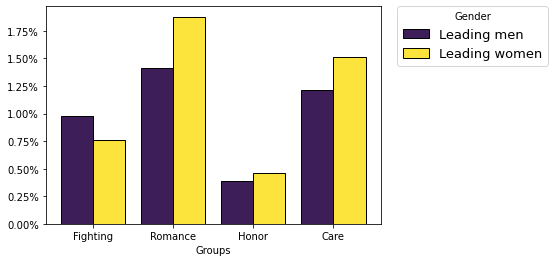

In [147]:
#Plotting gender and theme
colors = ["#3e1e58", "#fce43c", "#98c862", "#4c8e70"]
X = ['Fighting', 'Romance', 'Honor', 'Care']
Men = [0.977018,1.410014,0.388587,1.210170]
Women = [0.757045,1.878592,0.462638,1.514089]
  
X_axis = np.arange(len(X))
  
ax = plt.bar(X_axis - 0.2, Men, 0.4, label = 'Leading men', color ="#3e1e58",edgecolor='black', )
ax = plt.bar(X_axis + 0.2, Women, 0.4, label = 'Leading women',color ="#fce43c",edgecolor='black', )
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Gender', fontsize = 13)
#plt.show()
plt.savefig('gender and topics leading.png', bbox_inches='tight')

In [121]:
# create for loop for testing z-test
import statsmodels.api as sm

# list of columns we want to test 
test_list = ['Fighting','Romance','Honor','Care']
z_test_results = []
m_mean = []
w_mean = []

for column in test_list:
    column = column
    #testing significance share of FEMALE lines and writers gender by using a z-test 
    male = df1.query('Gender == "Men"')[column] #all_sentences is the dataframe
    male = sm.stats.DescrStatsW(male)
    male_mean = df1.loc[df['Gender'] == 'Men'][column].mean()
    m_mean.append(male_mean)
    female = df1.query('Gender == "Women"')[column]
    female = sm.stats.DescrStatsW(female)
    female_mean = df1.loc[df['Gender'] == 'Women'][column].mean()
    w_mean.append(female_mean)
    z_test = sm.stats.CompareMeans(male, female).ztest_ind(usevar='unequal',value=0)
    z_test_results.append(z_test)
    
test_df1 = pd.DataFrame(
    {'Topic': test_list,
     'Mean for men': m_mean,
     'Mean for women': w_mean,
     'Z_test': z_test_results,
    })



In [122]:
test_df1

,Topic,Mean for men,Mean for women,Z_test
0,Fighting,0.007386,0.011554,"(1.0976528201788198, 0.27235611877980104)"
1,Romance,0.016248,0.015886,"(-2.2517839738259533, 0.024335926930162084)"
2,Honor,0.004605,0.003301,"(-0.4764631388465098, 0.633744462165809)"
3,Care,0.014510,0.010728,"(-1.4267559436688344, 0.15365025409522462)"


[Text(0.5, 0, '')]

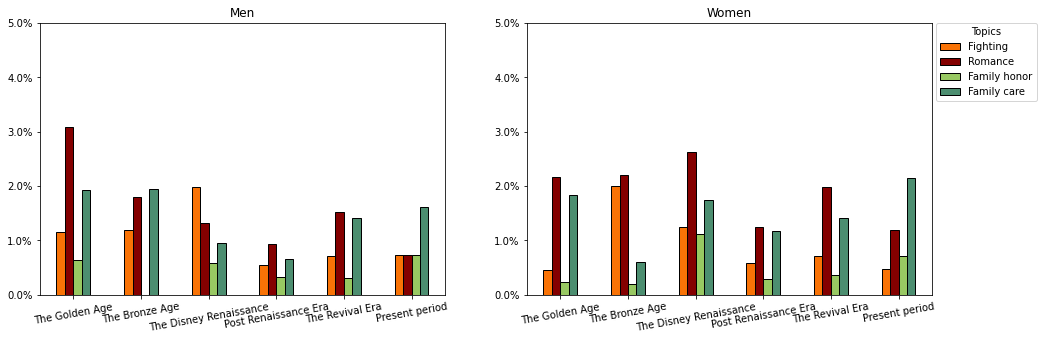

In [123]:
#Plotting era and theme for men and women 
import matplotlib.ticker as mtick
df_women = df1[df1.Gender == 'Women']
df_men = df1[df1.Gender == 'Men']

mean_era_women = df_women[['Fighting', 'Romance', 'Honor', 'Care','Era']].groupby('Era').mean()*100
mean_era_men = df_men[['Fighting', 'Romance', 'Honor', 'Care','Era']].groupby('Era').mean()*100

xlabels = ['The Golden Age', 'The Bronze Age', 'The Disney Renaissance',
       'Post Renaissance Era', 'The Revival Era', 'Present period']

colors = ["#F97306", "#840000", "#98c862", "#4c8e70"]

fig, axes = plt.subplots(1,2,figsize=(16, 5))

ax1 = mean_era_women.plot(kind='bar', ax = axes[1], edgecolor='black', 
                                color=colors, legend = False)
                                
ax1.set_title('Women')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis
ax1.set_axisbelow(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis
ax1.set_xticklabels(xlabels, rotation = 10)
ax1.set_ylim([0, 5])
ax1.set(xlabel=None)

ax1.legend(['Fighting', 'Romance', 'Family honor', 'Family care'], title='Topics', bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

# plot 2 
ax2 = mean_era_men.plot(kind='bar', ax = axes[0], edgecolor='black', 
                              color = colors, legend = False)
ax2.set_title('Men');
ax2.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis
ax2.set_axisbelow(True)
ax2.set_xticklabels(xlabels, rotation = 10)
ax2.set_ylim([0, 5])
ax2.set(xlabel=None)



In [124]:
# create for loop for testing anova
import pingouin as pg
aov = pg.anova(data=df1, dv='Fighting', between='Era', detailed=True)
aov1 = pg.anova(data=df1, dv='Romance', between='Era', detailed=True)
aov2 = pg.anova(data=df1, dv='Honor', between='Era', detailed=True)
aov3 = pg.anova(data=df1, dv='Care', between='Era', detailed=True)
print('Fighting is:',"\n","\n",aov)
print('Romance is:',"\n","\n",aov1)
print('Honor is:',"\n","\n",aov2)
print('Care is:',"\n","\n",aov3)

Fighting is: 
 
    Source          SS     DF        MS         F     p-unc       np2
0     Era    0.271410      5  0.054282  6.361481  0.000007  0.001942
1  Within  139.513073  16350  0.008533       NaN       NaN       NaN
Romance is: 
 
    Source          SS     DF        MS         F     p-unc       np2
0     Era    0.392803      5  0.078561  4.952714  0.000156  0.001512
1  Within  259.346008  16350  0.015862       NaN       NaN       NaN
Honor is: 
 
    Source         SS     DF        MS         F     p-unc       np2
0     Era   0.063418      5  0.012684  3.020969  0.009947  0.000923
1  Within  68.645496  16350  0.004199       NaN       NaN       NaN
Care is: 
 
    Source          SS     DF        MS         F     p-unc       np2
0     Era    0.205080      5  0.041016  3.106664  0.008331  0.000949
1  Within  215.862601  16350  0.013203       NaN       NaN       NaN
